<a href="https://colab.research.google.com/github/SonakshiA/Amazon-Book-Reviews-Sentiment-Analysis/blob/main/Amazon_Books_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
dataset = od.download('https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews')

In [ ]:
books_ratings = pd.read_csv('amazon-books-reviews/Books_rating.csv')
books_data = pd.read_csv('amazon-books-reviews/books_data.csv')

In [ ]:
books_ratings.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
books_data.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
print(books_ratings.shape)
print(books_data.shape)

(3000000, 10)
(212404, 10)


**Data Preprocessing**

In [ ]:
books = pd.merge(books_ratings,books_data, on='Title')
books.shape

(3000000, 19)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 457.8+ MB


Extracting Required Columns

In [ ]:
df= books[['Title','review/helpfulness','review/score','review/summary','review/text','ratingsCount']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   review/helpfulness  object 
 2   review/score        float64
 3   review/summary      object 
 4   review/text         object 
 5   ratingsCount        float64
dtypes: float64(2), object(4)
memory usage: 160.2+ MB


**Dropping Duplicates**

In [ ]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  362780


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

<ipython-input-12-415e6b1c808b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2637220, 6)

**Removing Null Reviews**

In [ ]:
null_values = df.isna().sum()
print("Number of entries with null values: ",null_values)

Number of entries with null values:  Title                     208
review/helpfulness          0
review/score                0
review/summary             34
review/text                 8
ratingsCount          1244445
dtype: int64


In [ ]:
df.dropna(inplace = True)
df.isna().sum()

<ipython-input-14-37a09600be87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title                 0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
ratingsCount          0
dtype: int64

In [ ]:
df.shape

(1392539, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392539 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Title               1392539 non-null  object 
 1   review/helpfulness  1392539 non-null  object 
 2   review/score        1392539 non-null  float64
 3   review/summary      1392539 non-null  object 
 4   review/text         1392539 non-null  object 
 5   ratingsCount        1392539 non-null  float64
dtypes: float64(2), object(4)
memory usage: 74.4+ MB


In [ ]:
df = df.sample(10000) #to reduce training time
df.shape

(10000, 6)

In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
df['word_count'] = df['review/text'].apply(no_of_words)

In [ ]:
df.head()

,Title,review/helpfulness,review/score,review/summary,review/text,ratingsCount,word_count
2303232,LBD: It's a Girl Thing,0/0,5.0,LBD its a great book!,What would you do if you were a teenage girl w...,1.0,243
2962853,"Red River, Vol. 1",1/1,5.0,Japanese Girl Goes to the Hittite Empire!,This is a time travel manga which has the girl...,2.0,84
187181,The city of God; (A Doubleday image book),3/4,5.0,City of God,This is an apologetic text in defence of the C...,1.0,168
2117903,Official Vintage Guitar Magazine Price Guide 2...,2/3,5.0,Great Resource,"In my opinion, this is an indispensable guide ...",3.0,25
2614584,"The Chalice And The Blade - Our History, Our F...",11/18,5.0,"Yes, but the partnership model never prevailed...","Riane Eisler's analysis of the dominator, hier...",9.0,387


**Number of reviews for each rating from 0 to 5**

In [ ]:
print("Number of reviews with rating 0: ",df[df['review/score']==0]['review/text'].count())
print("Number of reviews with rating 1: ",df[df['review/score']==1]['review/text'].count())
print("Number of reviews with rating 2: ",df[df['review/score']==2]['review/text'].count())
print("Number of reviews with rating 3: ",df[df['review/score']==3]['review/text'].count())
print("Number of reviews with rating 4: ",df[df['review/score']==4]['review/text'].count())
print("Number of reviews with rating 5: ",df[df['review/score']==5]['review/text'].count())

Number of reviews with rating 0:  0
Number of reviews with rating 1:  672
Number of reviews with rating 2:  512
Number of reviews with rating 3:  866
Number of reviews with rating 4:  1979
Number of reviews with rating 5:  5971


**SENTIMENT ANALYSIS**

**Alloting sentiments based on review/score**

*   0 for review/score 0,1,2 (negative review)
*   1 for review/score 3 (neutral)
*   2 for review/score 4,5 (positive)


In [ ]:
conditions = [(df['review/score']<3),(df['review/score']==3),(df['review/score']>3)]
choice = [0,1,2]
df['sentiment'] = np.select(conditions,choice)

In [ ]:
df.head(10)

,Title,review/helpfulness,review/score,review/summary,review/text,ratingsCount,word_count,sentiment
2303232,LBD: It's a Girl Thing,0/0,5.0,LBD its a great book!,What would you do if you were a teenage girl w...,1.0,243,2
2962853,"Red River, Vol. 1",1/1,5.0,Japanese Girl Goes to the Hittite Empire!,This is a time travel manga which has the girl...,2.0,84,2
187181,The city of God; (A Doubleday image book),3/4,5.0,City of God,This is an apologetic text in defence of the C...,1.0,168,2
2117903,Official Vintage Guitar Magazine Price Guide 2...,2/3,5.0,Great Resource,"In my opinion, this is an indispensable guide ...",3.0,25,2
2614584,"The Chalice And The Blade - Our History, Our F...",11/18,5.0,"Yes, but the partnership model never prevailed...","Riane Eisler's analysis of the dominator, hier...",9.0,387,2
2515007,Mein Kampf: My Struggle,69/79,5.0,Great Edition,really gives the reader a perpspective of what...,31.0,59,2
813473,"Lion, the Witch, and the Wardrobe",0/0,5.0,The Lion The Witch and The Wardrobe,This is probably one of the most popular fanta...,394.0,454,2
518576,Conspiracy in Death,0/1,4.0,I can't wait for the next book - Where is it???,I stumbled upon the 'Death' series by accident...,28.0,110,2
2055609,"Coast Road, By Barbara Delinsky, Unabridged 8 ...",0/0,4.0,Heavy subject can make a delightful read,First Delinsky &amp; I will read more of her. ...,13.0,32,2
128039,Stitch 'N Bitch Crochet: The Happy Hooker,0/0,5.0,love it,Bought as a Christmas gift. I read through it ...,19.0,25,2


**Pie Chart for Sentiment Distribution**

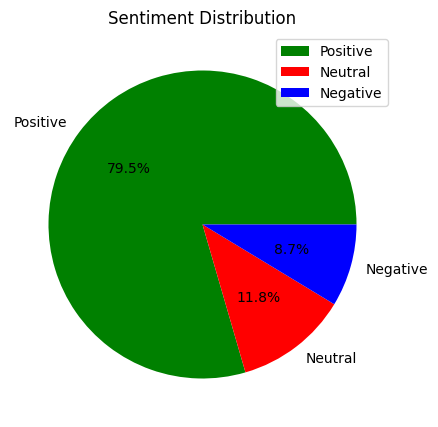

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sizes = df['sentiment'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']
colors=['green','red','blue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors)
plt.title('Sentiment Distribution')
plt.legend()
plt.show()

In [ ]:
for i in range(10):
  print("Review: ",[i])
  print(df['review/text'].iloc[i],"\n")
  print("Sentiment: ", df['sentiment'].iloc[i],"\n\n")

Review:  [0]
What would you do if you were a teenage girl who just wanted to have fun with your best buds, but your parents totally ruin everything? Claude Cassiera, Fleur Swan, and Ronnie Ripperton new exactly what to do. Since there parents were being totally unfair by not letting them go to the Astlebury Music Festival, they decided to stage a festival of their own. Blackwell Live would be the next best thing to Astlebury. If only life was that easy. Organizing a music festival would be tough work. First they would have to convince there Principal Mr. McGraw to let them have the festival, then getting bands together, funding money for stage equipment, and then trying to get the whole student body to participate. This was not going to be an easy task for the LBD, but with the help of some others, will the LBD pull this thing off?This book is about three troublesome teenagers trying to fight their way to life. Adventurous, hysterical, and exciting I would have to recommend this book t

**Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'@\w+|#','', text) #removing hashtags and @ symbol
  text = re.sub(r'[^\w\s]','',text) #removing punctuations
  #removing the stop words
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['review/text'] = df['review/text'].apply(data_processing)

**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
df['review/text'] = df['review/text'].apply(stemming)

**Visualizing Positive Reviews and Creating a WordCloud**

In [ ]:
pos_reviews = df[df.sentiment==2]
pos_reviews.head()

,Title,review/helpfulness,review/score,review/summary,review/text,ratingsCount,word_count,sentiment
2303232,LBD: It's a Girl Thing,0/0,5.0,LBD its a great book!,would teenage girl wanted fun best buds parent...,1.0,243,2
2962853,"Red River, Vol. 1",1/1,5.0,Japanese Girl Goes to the Hittite Empire!,time travel manga girl travel hittite empire f...,2.0,84,2
187181,The city of God; (A Doubleday image book),3/4,5.0,City of God,apologetic text defence chritian faith book au...,1.0,168,2
2117903,Official Vintage Guitar Magazine Price Guide 2...,2/3,5.0,Great Resource,opinion indispensable guide pricing guitars et...,3.0,25,2
2614584,"The Chalice And The Blade - Our History, Our F...",11/18,5.0,"Yes, but the partnership model never prevailed...",riane eislers analysis dominator hierarchical ...,9.0,387,2


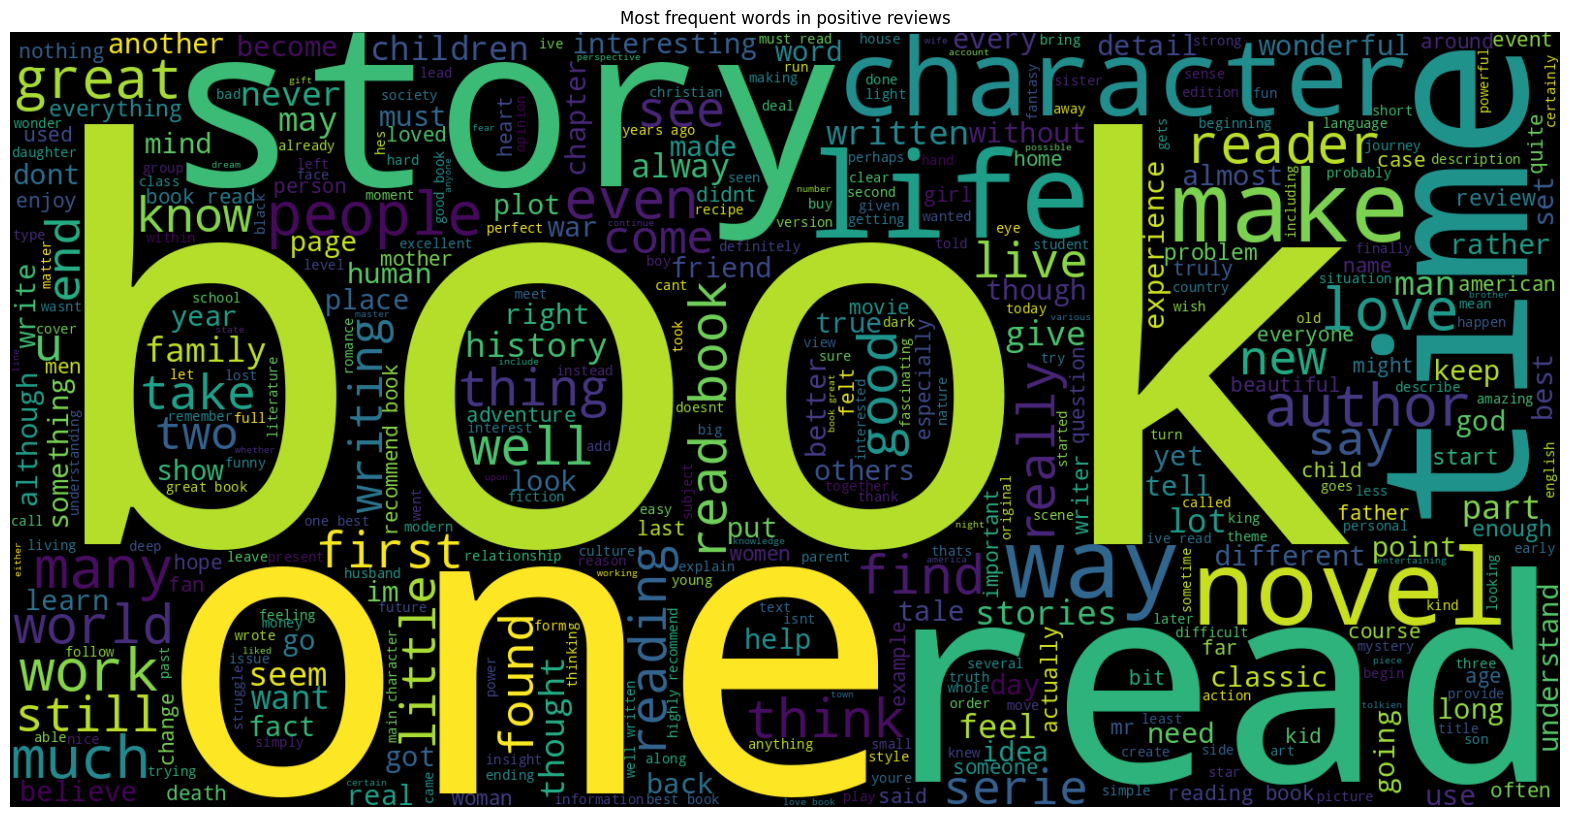

In [ ]:
text = ' '.join([word for word in pos_reviews['review/text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=400,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review/text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 14387),
 ('read', 6467),
 ('one', 4805),
 ('story', 3239),
 ('like', 2849),
 ('books', 2436),
 ('would', 2422),
 ('time', 2386),
 ('life', 2309),
 ('great', 2296),
 ('reading', 2180),
 ('good', 2060),
 ('many', 1984),
 ('first', 1942),
 ('love', 1831)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
pos_words.columns = ['Word','Count']
pos_words.head()

,Word,Count
0,book,14387
1,read,6467
2,one,4805
3,story,3239
4,like,2849


In [ ]:
import plotly.express as px
px.bar(pos_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Negative Reviews and Creating a WordCloud**

In [ ]:
neg_reviews = df[df.sentiment==0]
neg_reviews.head()

,Title,review/helpfulness,review/score,review/summary,review/text,ratingsCount,word_count,sentiment
2375040,Whose body?: A Lord Peter Wimsey novel,2/7,1.0,Tiny print,havent read book yet would ordered known small...,94.0,33,0
864202,The Silmarillion,3/10,2.0,GOOOOSCH ...!!!!! REALLY HARD READING !!!!,tolkien master fantasy doubt supose ill say le...,118.0,123,0
1586551,The Scarlet Letter (Courage Unabridged Classics),8/24,1.0,This book is TERRIBLE! If you want REASONS not...,book awful im sorry length next paragraph feel...,32.0,892,0
373372,The ceremonies of the Roman rite described,29/53,2.0,Not the Real Fortescue,adrian fortescue 18741923 would wanted nothing...,3.0,266,0
2019602,Forever Odd,1/2,2.0,Disappointing. Not a Koontz Classic,remember koontz stories great couldnt put coul...,67.0,142,0


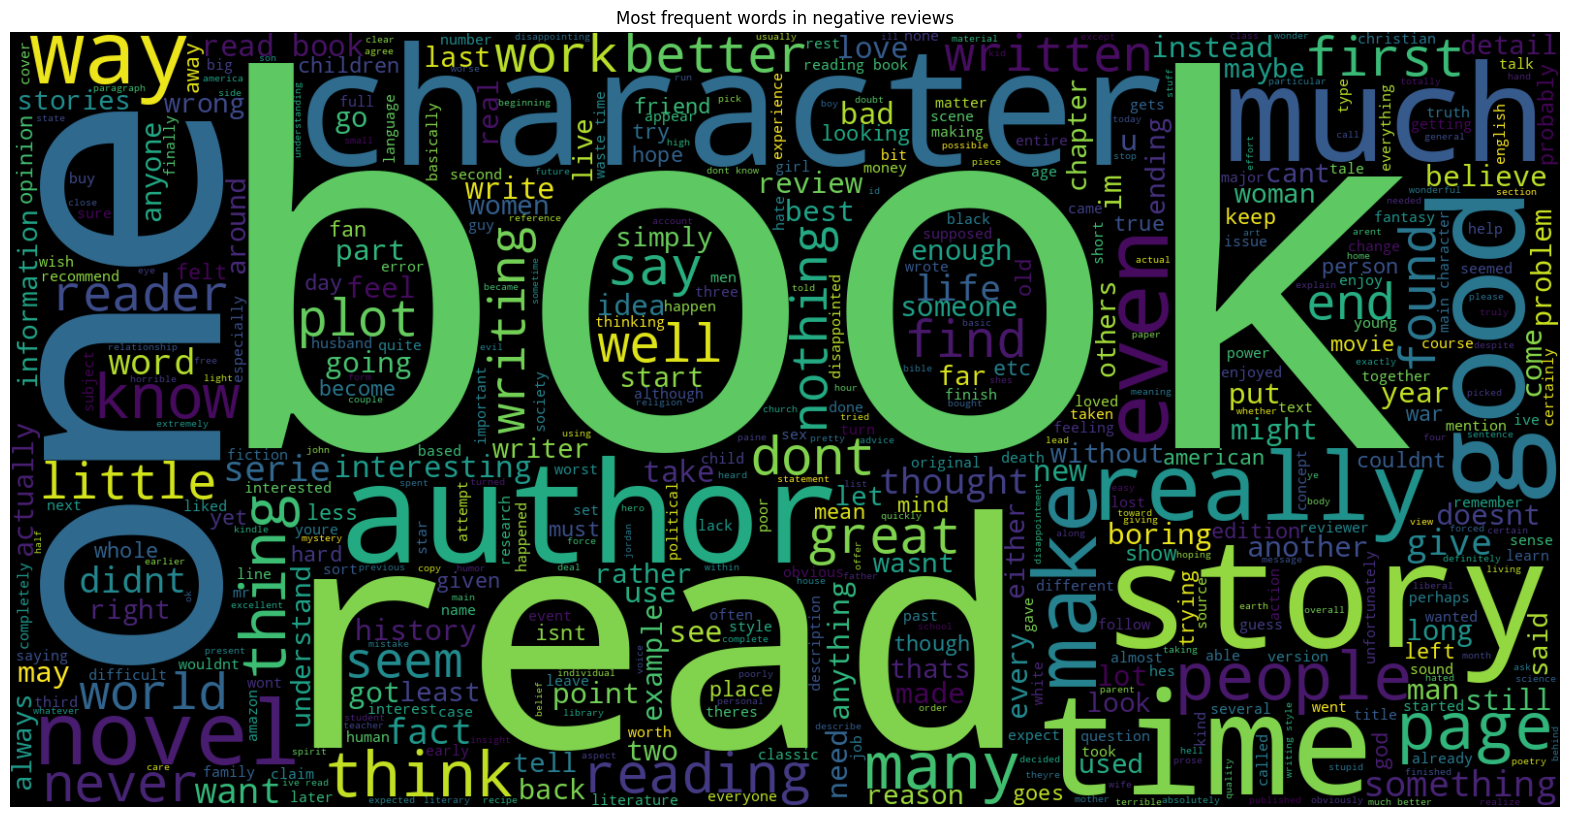

In [ ]:
text = ' '.join([word for word in neg_reviews['review/text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neg_reviews['review/text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 2498),
 ('read', 855),
 ('one', 759),
 ('would', 622),
 ('like', 592),
 ('books', 454),
 ('story', 425),
 ('time', 395),
 ('much', 374),
 ('dont', 358),
 ('characters', 352),
 ('good', 349),
 ('get', 339),
 ('really', 336),
 ('even', 335)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neg_words.columns = ['Word','Count']
neg_words.head()

,Word,Count
0,book,2498
1,read,855
2,one,759
3,would,622
4,like,592


In [ ]:
px.bar(neg_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Neutral Reviews**

In [ ]:
neutral_reviews = df[df.sentiment==1]
neutral_reviews.head()

,Title,review/helpfulness,review/score,review/summary,review/text,ratingsCount,word_count,sentiment
1066337,Interview with the Vampire,2/2,3.0,"Intricate, panoramic, luscious tale - ruined b...",quotinterview vampirequot powerful disturbing ...,23.0,236,1
1512479,Under Fire - A Corps Novel,1/2,3.0,Sad,others said 1944 1950 last knew killer china w...,1.0,112,1
2133558,Blankets: An Illustrated Novel (Turtleback Sch...,8/11,3.0,Simple Nostalgia,raw beautiful graphic novel young mans questio...,82.0,512,1
2110773,Girl with a Pearl Earring,1/2,3.0,Easy to read,found book enjoyable easy read characters plac...,2868.0,64,1
2916248,A Passage To India (Turtleback School & Librar...,8/12,3.0,Passage to India from the point of view of a h...,read book recommendation tenth grade english t...,1.0,279,1


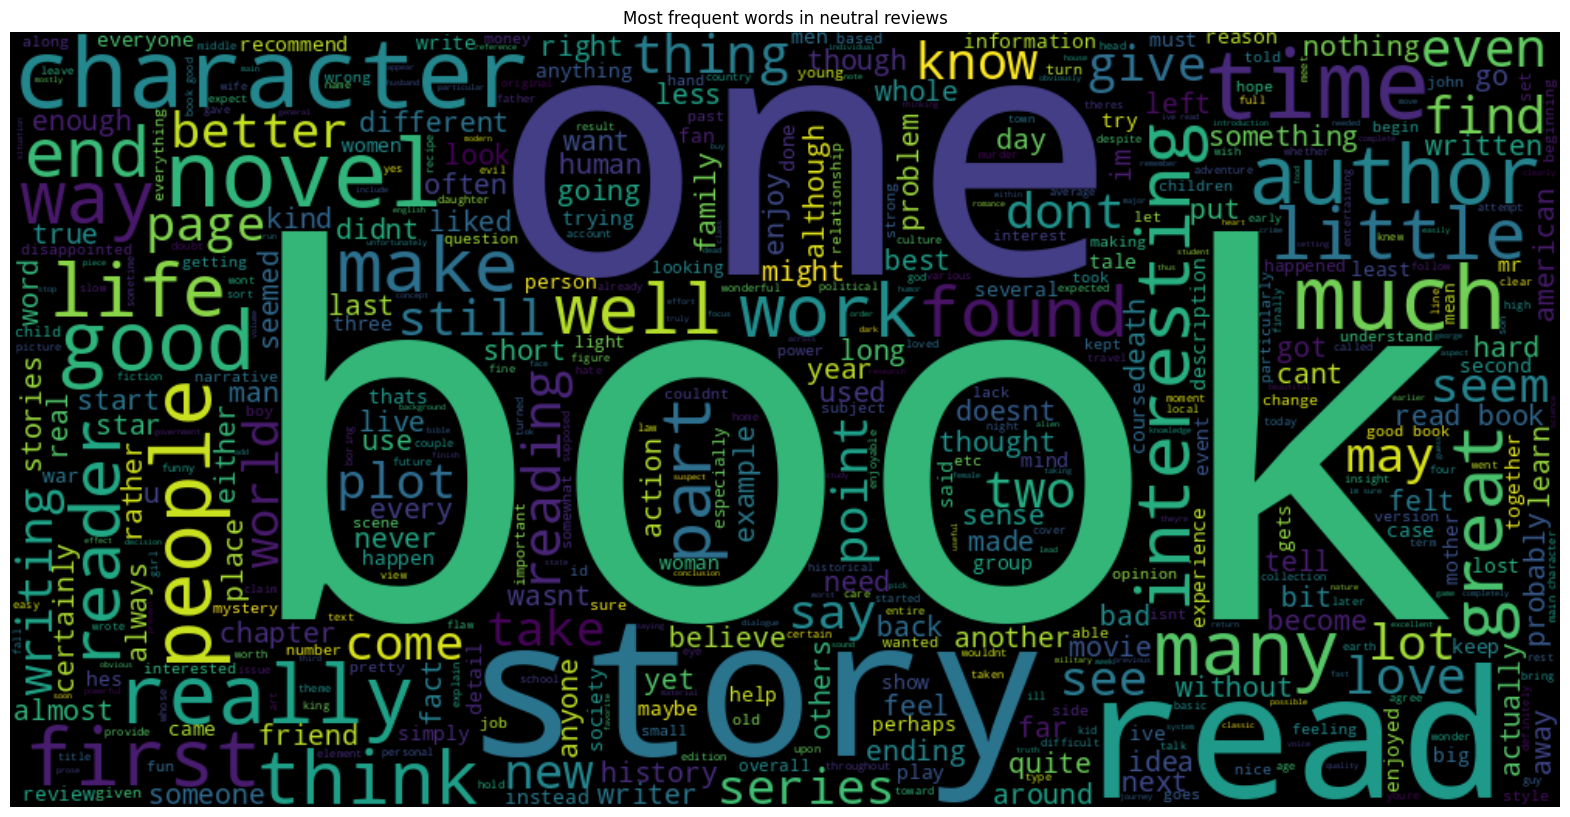

In [ ]:
text = ' '.join([word for word in neutral_reviews['review/text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1000,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neutral_reviews['review/text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('book', 1760),
 ('read', 647),
 ('one', 597),
 ('story', 565),
 ('would', 507),
 ('like', 462),
 ('good', 376),
 ('much', 335),
 ('time', 296),
 ('really', 293),
 ('books', 288),
 ('first', 272),
 ('many', 268),
 ('people', 262),
 ('characters', 258)]

In [ ]:
neutral_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neutral_words.columns = ['Word','Count']
neutral_words.head()

,Word,Count
0,book,1760
1,read,647
2,one,597
3,story,565
4,would,507


In [ ]:
px.bar(neutral_words,x='Count',y='Word',title='Common words in neutral reviews',color='Word')

**Factoring the Data**

In [ ]:
reviews_df = df[['review/text', 'sentiment']]
reviews_df.head()

,review/text,sentiment
2303232,would teenage girl wanted fun best buds parent...,2
2962853,time travel manga girl travel hittite empire f...,2
187181,apologetic text defence chritian faith book au...,2
2117903,opinion indispensable guide pricing guitars et...,2
2614584,riane eislers analysis dominator hierarchical ...,2


In [ ]:
x = reviews_df.drop(['sentiment'], axis=1)
y = reviews_df['sentiment']

In [ ]:
print(x.shape)
print(y.shape)

(10000, 1)
(10000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer() #Read more about TF-IDF
x = vect.fit_transform(df['review/text'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =0)

In [ ]:
print("Size of x_train: ",x_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_train: ",y_train.shape)
print("Size of y_test: ",y_test.shape)

Size of x_train:  (7000, 66004)
Size of x_test:  (3000, 66004)
Size of y_train:  (7000,)
Size of y_test:  (3000,)


**Creating ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

80.73333333333333


In [ ]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print(svc_acc*100)

82.46666666666667


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc*100)

79.06666666666666


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc*100)

73.23333333333333


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=decision_tree)
bagging_classifier.fit(x_train, y_train)
bagg_pred = bagging_classifier.predict(x_test)
bagg_acc = accuracy_score(bagg_pred, y_test)
print(bagg_acc*100)

79.0


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = SVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  81.33333333333333


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC(probability = True)

voting_model = VotingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], voting = 'soft')
voting_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  79.23333333333333


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  79.23333333333333


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = SVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  79.23333333333333


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  82.96666666666667


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
lr_model = LogisticRegression()
svm_model = LinearSVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('lr',lr_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  82.53333333333333
